##Hi all as we know credit card fraud detection will have a imbalanced data i.e having more number of normal class than the number of fraud class

###In this I will use Basic method of handling imbalance data which are
 ** This all I have done by using Analytics Vidya's blog please find the link [Analytics Vidya](https://www.analyticsvidhya.com/blog/2017/03/read-commonly-used-formats-using-python/)  **

Undersampling:- it means taking the less number of majority class (In our case taking less number of Normal transactions so that our new data will be balanced

Oversampling: it means using replicating the data of minority class (fraud class) so that we can have a balanced data

SMOTE: it is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data

First I will start with the Undersampling and will try to classify using these Models
1. Decision Tree Classifier/ Random Forest Classifier

2. Logistic regression

3. SVM

4. XGboost

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test.csv
train.csv



###Lets start with Importing Libraries and data

In [5]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("creditcard.csv",header = 0)

####Now explore the data to get insight in it

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

1. Hence we can see there are 284,807 rows and 31 columns which is a huge data
2.  Time is also in float here mean it can be only seconds starting from a particular time

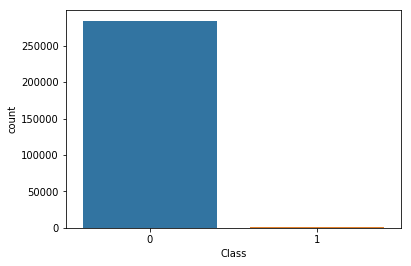

In [8]:
# Now lets check the class distributions
sns.countplot("Class",data=data)

1. As we know data is imbalanced and this graph also confirmed it 

In [9]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


1. Hence in data there is only 0.17 % are the fraud transcation while 99.83 are valid transcation
2. So now we have to do resampling of this data
3. before doing resampling lets have look at the amount related to valid transcation and fraud transcation

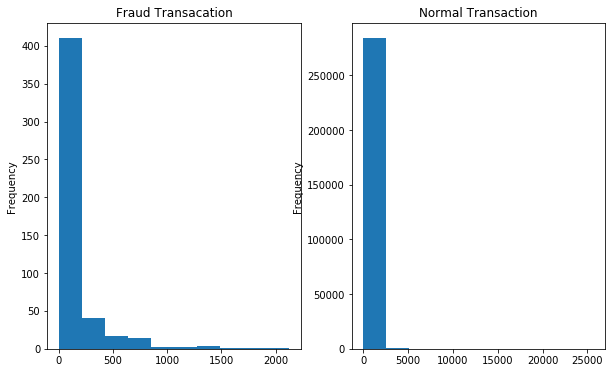

In [10]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

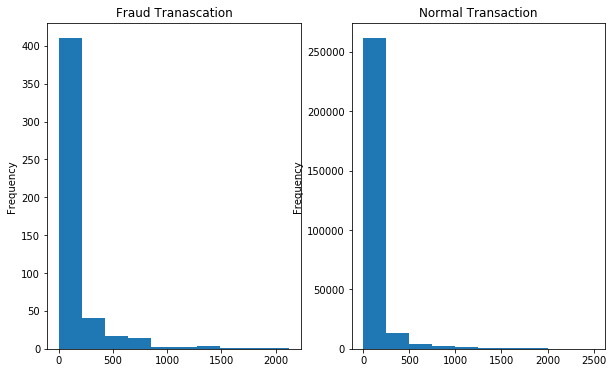

In [11]:
# the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

1. Here now after exploring data we can say there is no pattern in data
2. Now lets start with resmapling of data

###ReSampling - Under Sampling

Before re sampling lets have look at the different accuracy matrices

Accuracy = TP+TN/Total

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

TP = True possitive means no of possitve cases which are predicted possitive

TN = True negative means no of negative cases which are predicted negative

FP = False possitve means no of negative cases which are predicted possitive

FN= False Negative means no of possitive cases which are predicted negative

Now for our case recall will be a better option because in these case no of normal transacations will be very high than the no of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

Resampling

in this we will resample our data with different size

then we will try to use this resampled data to train our model

then we will use this model to predict for our original data

In [12]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [13]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    

In [14]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [15]:
# before starting we should standridze our ampount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Logistic Regression with Undersample Data

In [16]:
# Now make undersample data with differnt portion
# here i will take normal trasaction in  0..5 %, 0.66% and 0.75 % proportion of total data now do this for 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")
    
# here 1st proportion conatain 50% normal transaction
#Proportion 2nd contains 66% noraml transaction
#proportion 3rd contains 75 % normal transaction

the undersample data for 1 proportion



KeyError: '[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] not in index'

 1. As the number of normal transaction is increasing the recall for fraud transcation is decreasing
 2. TP = no of fraud transaction which are predicted fraud
 3.  TN = no. of normal transaction which are predicted normal
 4.  FP =  no of normal transaction which are predicted fraud
 5.  FN =no of fraud Transaction which are predicted normal

In [ ]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. Here we can see it is following same recall pattern as it  was for under sample data that's sounds good but if we have look at the precision is very less

2. So we should built a model which is correct overall

3. Precision is less means we are predicting other class wrong like as for our third part  there were 953 transaction are predicted fraud it means we and recall is good then it means we are catching fraud transaction very well but we are catching innocent transaction also i.e which are not fraud.

4. So with recall our precision should be better

5. if we go by this model then we are going to put 953 innocents in jail with the all criminal who have actually done this
6. Hence we are mainly lacking in the precision how can we increase our precision
7. Don't get confuse with above output showing that the two training data and two test data first one is for undersample data  while another one is for our whole data

1.**Try with SVM and then Random Forest in same Manner**

2. from Random forest we can get which features are more important

*SVM with Undersample data*

In [ ]:
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= SVC()# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")
    

1. Here recall and precision are approximately equal to Logistic Regression 

2. Lets try for whole data

In [ ]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=SVC()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. A better recall but precision is not improving much 

2 .so to improve precision we must have to tune the  hyper parameter of these models

3 That I will do in next version 

4 For now lets try with my favorite Random Forest classifier 

In [ ]:
# Random Forest Classifier with undersample data only
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")
    

In [ ]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=RandomForestClassifier(n_estimators=100)
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. for the third proportion the precision is 0.33 which is better than others

2. Lets try to get only import features using  Random Forest Classifier 

3. After it i will do analysis only for one portion that is 0.5 %

In [ ]:
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features use

1.  we can see this is showing the importance of feature for the making decision 

2. V14 is having a very good importance compare to other features

3. Lets use only top 5 (V14,V10,V12,V17,V4) feature to predict using Random forest classifier only for 0.5 % 

In [ ]:
# make a new data with only class and V14
data1=data[["V14","V10","V12","V17","V4","Class"]]
data1.head()

In [ ]:
Undersample_data1 = undersample(normal_indices,fraud_indices,1)
#only for 50 % proportion it means normal transaction and fraud transaction are equal so passing 
Undersample_data1_features_train,Undersample_data1_features_test,Undersample_data1_labels_train,Undersample_data1_labels_test = data_prepration(Undersample_data1)

In [ ]:
clf= RandomForestClassifier(n_estimators=100)
model(clf,Undersample_data1_features_train,Undersample_data1_features_test,Undersample_data1_labels_train,Undersample_data1_labels_test)

###Over Sampling

 1. In my previous version I got the 100 recall and 98 % precision by using Random forest with the over sampled data but in real it was due to over fitting because i was taking whole fraud data and was training for that and I was doing the testing on the same data.

 2. Please find link of previous version for more understanding [Link](https://www.kaggle.com/gargmanish/d/dalpozz/creditcardfraud/fraud-detection-100-recall-98-precision/run/1033018)

3. Thanks to Mr. Dominik Stuerzer for help 

In [ ]:
# now we will divied our data sets into two part and we will train and test and will oversample the train data and predict for test data
# lets import data again
data = pd.read_csv("../input/creditcard.csv",header = 0)
print("length of training data",len(data))
print("length of normal data",len(data[data["Class"]==0]))
print("length of fraud  data",len(data[data["Class"]==1]))

In [ ]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
data_train_X.columns
data_train_y.columns

In [ ]:
# ok Now we have a traing data
data_train_X["Class"]= data_train_y["Class"] # combining class with original data
data_train = data_train_X.copy() # for naming conevntion
print("length of training data",len(data_train))
# Now make data set of normal transction from train data
normal_data = data_train[data_train["Class"]==0]
print("length of normal data",len(normal_data))
fraud_data = data_train[data_train["Class"]==1]
print("length of fraud data",len(fraud_data))

In [ ]:
# Now start oversamoling of training data 
# means we will duplicate many times the value of fraud data
for i in range (365): # the number is choosen by myself on basis of nnumber of fraud transaction
    normal_data= normal_data.append(fraud_data)
os_data = normal_data.copy() 
print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

 1. The proportion now becomes the 60 % and 40 % that is good now

In [ ]:
# before applying any model standerdize our data amount 
os_data["Normalized Amount"] = StandardScaler().fit_transform(os_data['Amount'].reshape(-1, 1))
os_data.drop(["Time","Amount"],axis=1,inplace=True)
os_data.head()


In [ ]:
# Now use this oversampled data for trainig the model and predict value for the test data that we created before
# now let us try within the the oversampled data itself
# for that we need to split our oversampled data into train and test
# so call our function data Prepration with oversampled data
os_train_X,os_test_X,os_train_y,os_test_y=data_prepration(os_data)
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_train_X,os_test_X,os_train_y,os_test_y)

**Observations**

 1. As it have too many sample of  same fraud data so may be the all which are present in train data are present in test data also so we can say it is over fitting 
 2. So lets try with test data that one which we created in starting of oversampling segment no fraud transaction from that data have been repeated here
 3. Lets try

 

In [ ]:
# now take all over sampled data as trainging and test it for test data
os_data_X = os_data.ix[:,os_data.columns != "Class"]
os_data_y = os_data.ix[:,os_data.columns == "Class"]
#for that we have to standrdize the normal amount and drop the time from it
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X.head()



In [ ]:
# now use it for modeling
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

**Observations**

 1. Now here we can see recall decrease to only 83 % which is not bad  but not good also
 2. The precision is 0.93 which is good 
 3. from these observation we can say that the oversampling is better than the Under sampling because on Under sampling we were loosing a large amount of data or we can say a good amount of information so why the there precision was very low 

###SMOTE

In [ ]:
# Lets Use SMOTE for Sampling
# As I mentioned it is also a type of oversampling but in this the data is not replicated but they are created 
#lets start with importing libraries
from imblearn.over_sampling import SMOTE
data = pd.read_csv('../input/creditcard.csv')

In [ ]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
columns = data_train_X.columns


In [ ]:
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

 1. By using Smote we are getting a 50 - 50 each

 2. No need of checking here in over sampled data itself from previous we know it will be overfitting

 3. let us check with the test data direct


In [ ]:
# Let us first do our amount normalised and other that we are doing above
os_data_X["Normalized Amount"] = StandardScaler().fit_transform(os_data_X['Amount'].reshape(-1, 1))
os_data_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)


In [ ]:
# Now start modeling
clf= RandomForestClassifier(n_estimators=100)
# train data using oversampled data and predict for the test data
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

**observation **

 1. The recall is nearby the previous one done by over sampling 
 2. The precision decrease in this case